# 1. 강의영상 

{{<video ???? >}}

# 2. Imports

In [3]:
#!pip install autogluon.eda

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
#---#
from autogluon.tabular import TabularPredictor
import autogluon.eda.auto as auto
#---#
import warnings
warnings.filterwarnings('ignore')

# 3. Data

In [2]:
df_train = pd.read_csv('https://raw.githubusercontent.com/guebin/MP2023/master/posts/mid/icesales_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/guebin/MP2023/master/posts/mid/icesales_test.csv')

In [3]:
df_train.head()

,temp,type,sales
0,19.4,choco,64.807407
1,0.9,vanilla,25.656697
2,7.4,vanilla,34.756650
3,4.5,choco,27.265442
4,21.1,choco,70.606946


# 4. 적합

In [4]:
# step1 -- pass
# step2 
predictr = TabularPredictor(label = 'sales')
# step3 
predictr.fit(df_train,num_gpus=1)
# step4 
yhat = predictr.predict(df_train)

No path specified. Models will be saved in: "AutogluonModels/ag-20231130_195446/"
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels/ag-20231130_195446/"
AutoGluon Version:  0.8.1
Python Version:     3.10.13
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #140-Ubuntu SMP Thu Aug 4 02:23:37 UTC 2022
Disk Space Avail:   1585.63 GB / 1887.51 GB (84.0%)
Train Data Rows:    280
Train Data Columns: 2
Label Column: sales
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (88.99437629756306, 10.335207096486446, 51.10189, 21.16757)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Feature Generators to preprocess the data ...
Fitting AutoM

[1000]	valid_set's rmse: 3.11194


	-3.1036	 = Validation score   (-root_mean_squared_error)
	2.06s	 = Training   runtime
	0.0s	 = Validation runtime
Fitting model: LightGBM ...
	Training LightGBM with GPU, note that this may negatively impact model quality compared to CPU training.
[LightGBM] [Fatal] GPU Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_GPU=1
	-3.0864	 = Validation score   (-root_mean_squared_error)
	0.29s	 = Training   runtime
	0.0s	 = Validation runtime
Fitting model: RandomForestMSE ...
	-2.9027	 = Validation score   (-root_mean_squared_error)
	0.42s	 = Training   runtime
	0.06s	 = Validation runtime
Fitting model: CatBoost ...
	Training CatBoost with GPU, note that this may negatively impact model quality compared to CPU training.
	-2.9171	 = Validation score   (-root_mean_squared_error)
	5.26s	 = Training   runtime
	0.0s	 = Validation runtime
Fitting model: ExtraTreesMSE ...
	-2.88	 = Validation score   (-root_mean_squared_error)
	0.42s	 = Training   runtime
	0.0

<AxesSubplot: xlabel='temp', ylabel='sales'>

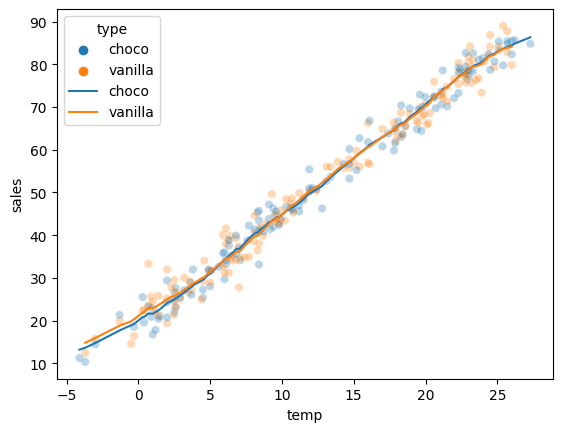

In [5]:
sns.scatterplot(df_train, x='temp', y='sales', hue='type',alpha=0.3)
sns.lineplot(df_train, x='temp',y=yhat, hue='type')

In [7]:
predictr.leaderboard(silent=True)

,model,score_val,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L2,-2.548520,0.103926,5.059316,0.000329,0.241807,2,True,12
1,NeuralNetTorch,-2.575142,0.003671,1.547552,0.003671,1.547552,1,True,10
2,NeuralNetFastAI,-2.618211,0.007230,2.847540,0.007230,2.847540,1,True,8
3,KNeighborsUnif,-2.731556,0.032436,0.005230,0.032436,0.005230,1,True,1
4,ExtraTreesMSE,-2.879997,0.055683,0.422803,0.055683,0.422803,1,True,7
5,RandomForestMSE,-2.902703,0.060261,0.417186,0.060261,0.417186,1,True,5
6,LightGBMLarge,-2.906174,0.002508,0.490475,0.002508,0.490475,1,True,11
7,CatBoost,-2.917132,0.003046,5.255113,0.003046,5.255113,1,True,6
8,XGBoost,-3.061021,0.003952,0.770712,0.003952,0.770712,1,True,9
9,LightGBM,-3.086423,0.001102,0.293437,0.001102,0.293437,1,True,4


# 5. 해석 및 시각화 

## A. y의 분포, (X,y)의 관계 시각화 

## Target variable analysis

,count,mean,std,min,25%,50%,75%,max,dtypes,unique,missing_count,missing_ratio,raw_type,special_types
sales,280,51.101886,21.167573,10.335207,33.053077,47.844021,70.451589,88.994376,float64,280,,,float,


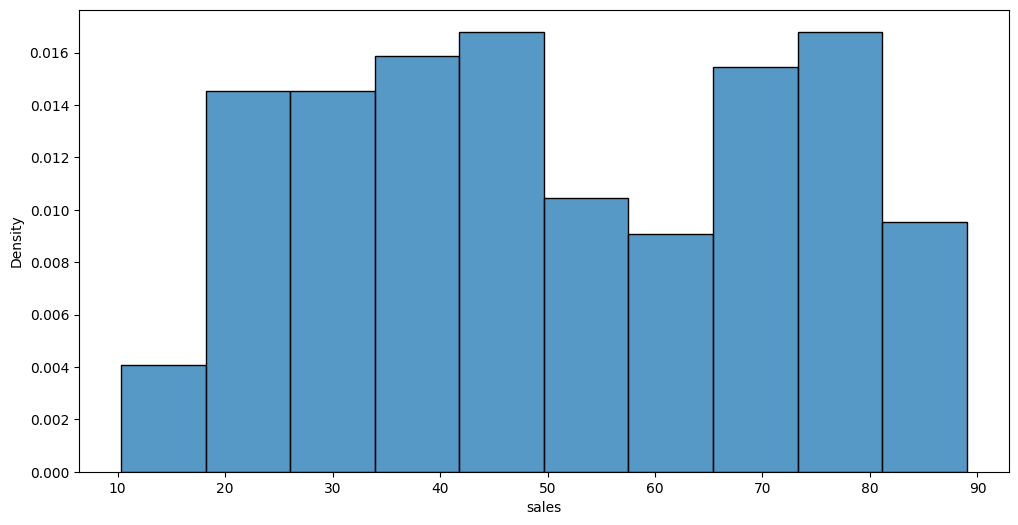

### Target variable correlations

**`train_data` - `spearman` correlation matrix; focus: absolute correlation for `sales` >= `0.5`**

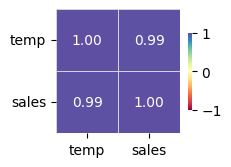

**Feature interaction between `temp`/`sales` in `train_data`**

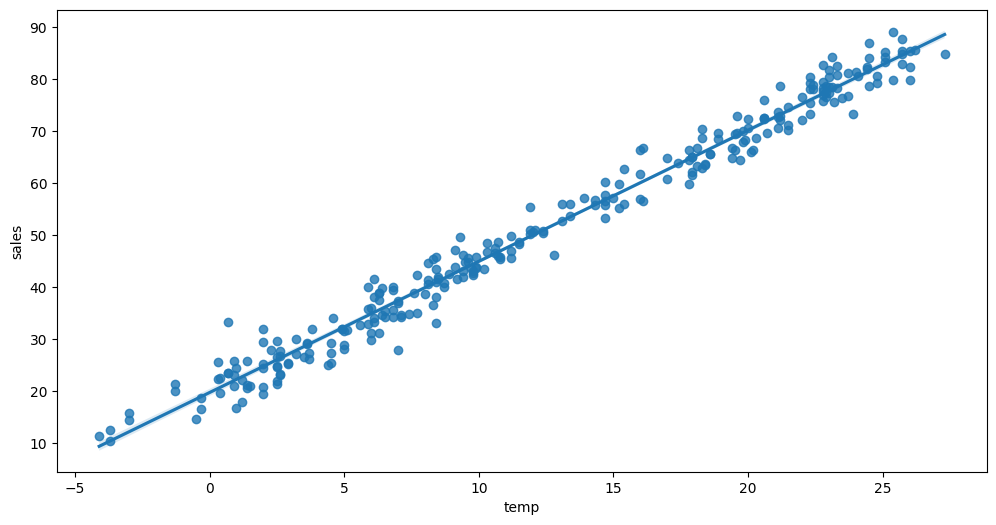

In [8]:
auto.target_analysis(
    train_data=df_train, 
    label='sales',
    fit_distributions=False
)

- Type는 중요하지 않음 

## B. 중요한 설명변수

No path specified. Models will be saved in: "AutogluonModels/ag-20231130_121551/"


### Model Prediction for sales

Using validation data for `Test` points

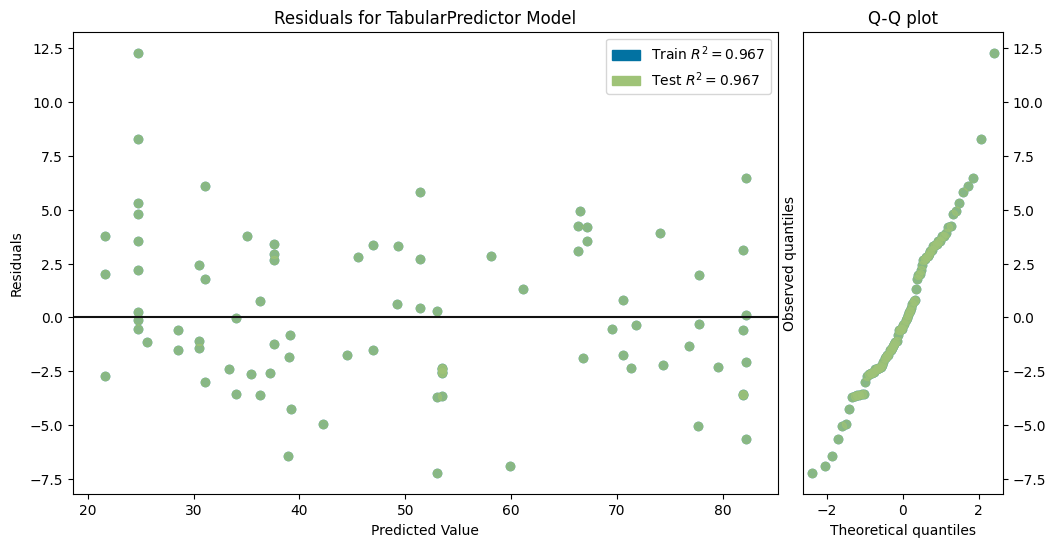

### Model Leaderboard

,model,score_test,score_val,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,LightGBMXT,-3.549018,-4.206044,0.002171,0.001249,0.27914,0.002171,0.001249,0.27914,1,True,1


### Feature Importance for Trained Model

,importance,stddev,p_value,n,p99_high,p99_low
temp,25.164809,1.617020,0.000002,5,28.494276,21.835342
type,-0.048470,0.059119,0.929654,5,0.073258,-0.170197


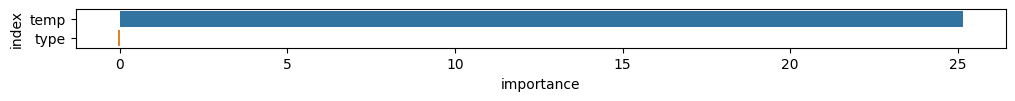

### Rows with the highest prediction error

Rows in this category worth inspecting for the causes of the error

,temp,type,sales,sales_pred,error
73,-3.7,vanilla,12.432354,24.724379,12.292025
191,-0.3,vanilla,16.436525,24.724379,8.287854
218,14.7,choco,60.178468,52.961044,7.217424
166,16.1,choco,66.821367,59.932861,6.888506
5,23.2,vanilla,75.697957,82.155197,6.457240
118,8.3,choco,45.364110,38.923119,6.440991
198,4.4,vanilla,24.924572,31.039103,6.114530
7,11.2,choco,45.593168,51.416027,5.822859
89,25.7,vanilla,87.788320,82.155197,5.633123
109,2.0,vanilla,19.398204,24.724379,5.326174


In [9]:
auto.quick_fit(
    train_data = df_train, 
    label='sales',
    show_feature_importance_barplots=True
)

- type는 중오하지않음 

## C. 관측치별 해석 

,temp,type,sales
0,19.4,choco,64.807407


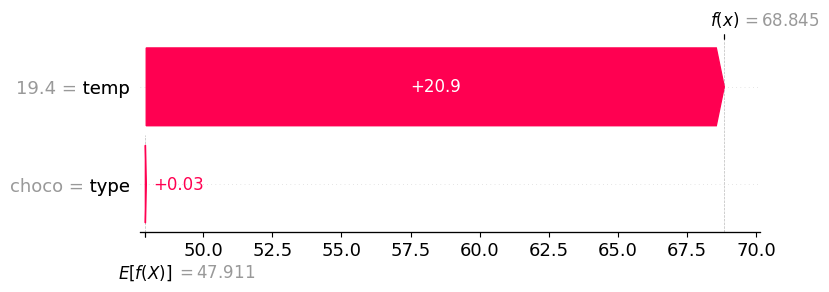

In [10]:
auto.explain_rows(
    train_data=df_train,
    model=predictr,
    display_rows=True,
    plot='waterfall',
    rows=df_train.iloc[[0]]
)

,temp,type,sales
1,0.9,vanilla,25.656697


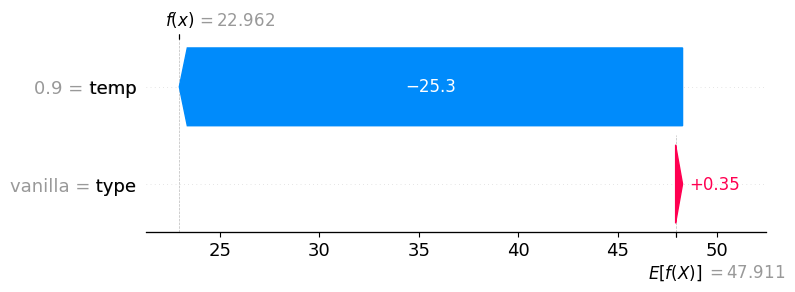

In [11]:
auto.explain_rows(
    train_data=df_train,
    model=predictr,
    display_rows=True,
    plot='waterfall',
    rows=df_train.iloc[[1]]
)